In [14]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, LSTM, Activation, Embedding
from sklearn.model_selection import StratifiedKFold, train_test_split
from keras.utils import np_utils
from keras.preprocessing import sequence

In [7]:
# 데이터 불러오기
from keras.datasets import reuters

(x_train,y_train), (x_test,y_test) = reuters.load_data(num_words=1000, test_split=0.2)
# 같은길이로 맞춤
x_train = sequence.pad_sequences(x_train, maxlen = 100)
x_test = sequence.pad_sequences(x_test, maxlen = 100)
# 원핫인코딩
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [11]:
y_train.shape

(8982, 46)

In [17]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
mkdir = './model/'
if not os.path.exists(mkdir):
    os.mkdir(mkdir)
model_path = '{epoch:}-{val_loss}.hdf5'
checkpoint = ModelCheckpoint(filepath = model_path, monitor = 'val_loss', save_best_only = True)
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5)

model = Sequential()
model.add(Embedding(1000,100))
model.add(LSTM(100, activation = 'tanh')) # LSTM은 tanh를 사용
model.add(Dense(46,activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = 'accuracy')
history = model.fit(x_train,y_train, validation_data = (x_test,y_test), epochs = 20, batch_size = 100, callbacks = [checkpoint, early_stop])
model.summary()

Epoch 1/20
90/90 [==============================] - 18s 167ms/step - loss: 2.5977 - accuracy: 0.3579 - val_loss: 2.2413 - val_accuracy: 0.4604
Epoch 2/20
90/90 [==============================] - 14s 161ms/step - loss: 2.0794 - accuracy: 0.4863 - val_loss: 2.0292 - val_accuracy: 0.5147
Epoch 3/20
90/90 [==============================] - 14s 153ms/step - loss: 2.0213 - accuracy: 0.4990 - val_loss: 1.9687 - val_accuracy: 0.5183
Epoch 4/20
90/90 [==============================] - 14s 155ms/step - loss: 1.8662 - accuracy: 0.5324 - val_loss: 1.8247 - val_accuracy: 0.5552
Epoch 5/20
90/90 [==============================] - 15s 164ms/step - loss: 1.7386 - accuracy: 0.5576 - val_loss: 1.7636 - val_accuracy: 0.5637
Epoch 6/20
90/90 [==============================] - 13s 147ms/step - loss: 1.6723 - accuracy: 0.5774 - val_loss: 1.6378 - val_accuracy: 0.5993
Epoch 7/20
90/90 [==============================] - 14s 151ms/step - loss: 1.5444 - accuracy: 0.6181 - val_loss: 1.5864 - val_accuracy: 0.6024

281/281 [==============================] - 6s 22ms/step - loss: 0.7188 - accuracy: 0.8166
0.8166332840919495


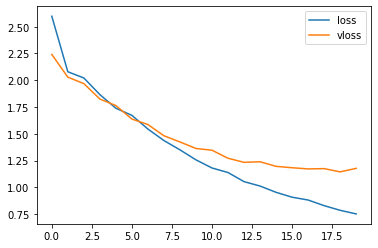

In [18]:
loss = history.history['loss']
vloss = history.history['val_loss']
x_len = np.arange(len(loss))
plt.plot(x_len,loss,label='loss')
plt.plot(x_len,vloss,label='vloss')
plt.legend()
plt.show

print(model.evaluate(x_train,y_train)[1])

---

In [22]:
from keras.datasets import imdb
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=5000)
x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen=100)

In [23]:
x_train.shape

(25000, 100)

In [27]:
from keras.layers import Conv1D, MaxPooling1D
model_dir = './model/'
if not os.path.exists(model_dir):
    os.mkdir(model_dir)
model_path = '{epoch:}-{val_loss}.hdf5'
checkpoint = ModelCheckpoint(filepath = model_path, monitor = 'val_loss', save_best_only = True)
earlystop = EarlyStopping(monitor = 'val_loss', patience = 5)
model = Sequential()
model.add(Embedding(5000,50))
model.add(Dropout(0.5))
model.add(Conv1D(32,5,padding='Valid',activation = 'relu' ))
model.add(MaxPooling1D(4))
model.add(LSTM(30, activation = 'tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = 'accuracy')
history=model.fit(x_train,y_train,validation_data = (x_test,y_test), callbacks = [checkpoint,earlystop], epochs =20, batch_size=100)

Epoch 1/20
250/250 [==============================] - 12s 39ms/step - loss: 0.4917 - accuracy: 0.7387 - val_loss: 0.3476 - val_accuracy: 0.8488
Epoch 2/20
250/250 [==============================] - 9s 37ms/step - loss: 0.3094 - accuracy: 0.8698 - val_loss: 0.3335 - val_accuracy: 0.8536
Epoch 3/20
250/250 [==============================] - 9s 37ms/step - loss: 0.2669 - accuracy: 0.8904 - val_loss: 0.3380 - val_accuracy: 0.8507
Epoch 4/20
250/250 [==============================] - 9s 37ms/step - loss: 0.2422 - accuracy: 0.9032 - val_loss: 0.3320 - val_accuracy: 0.8557
Epoch 5/20
250/250 [==============================] - 9s 37ms/step - loss: 0.2199 - accuracy: 0.9126 - val_loss: 0.3441 - val_accuracy: 0.8553
Epoch 6/20
250/250 [==============================] - 9s 37ms/step - loss: 0.1955 - accuracy: 0.9233 - val_loss: 0.3626 - val_accuracy: 0.8512
Epoch 7/20
250/250 [==============================] - 9s 37ms/step - loss: 0.1757 - accuracy: 0.9316 - val_loss: 0.3642 - val_accuracy: 0.851

782/782 [==============================] - 3s 4ms/step - loss: 0.4005 - accuracy: 0.8480

 Test Accuracy: 0.8480


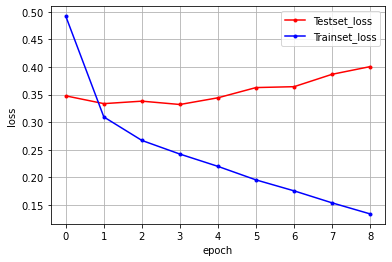

In [29]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))


# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()